In [5]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [6]:
train = pd.read_csv('../dataset/processed/train.csv',parse_dates=['Date'], index_col='Date')


In [7]:
train = train.drop(columns=["Commodity", "Item"])
train.head()

,Price
Date,
2013-06-16,37.5
2013-06-16,29.0
2013-06-16,20.5
2013-06-16,15.5
2013-06-16,29.0


<Axes: xlabel='Date'>

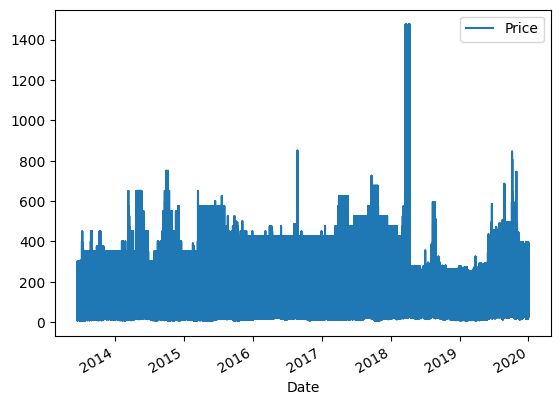

In [8]:
train.plot()

In [9]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(train['Price'])

In [10]:
# Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [11]:
adfuller_test(train['Price'])

ADF Test Statistic : -17.09342756375355
p-value : 7.56307261282808e-30
#Lags Used : 76
Number of Observations Used : 157362
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

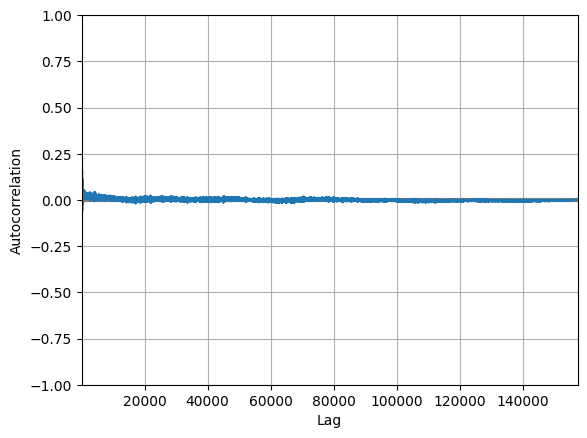

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Price'])
plt.show()

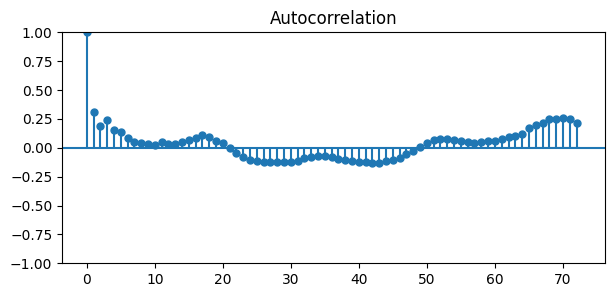

In [14]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(train['Price'], ax=ax, lags=72)
plt.show()

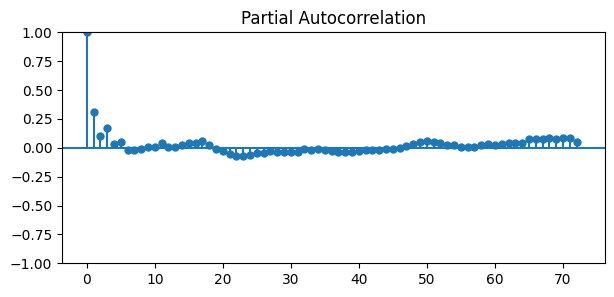

In [15]:
# Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(train['Price'], ax=ax, lags=72, method='ywm')
plt.show()

In [16]:
train['Price_diff'] = train['Price'].diff(12)
train['Price_diff'].dropna(inplace=True)

adfuller_test(train['Price_diff'].dropna())


ADF Test Statistic : -101.76187748553367
p-value : 0.0
#Lags Used : 76
Number of Observations Used : 157350
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [42]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model = SARIMAX(train['Price'],
#                 order=(3, 0, 2),
#                 seasonal_order=(1, 1, 1, 12),
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)
# results = model.fit()

In [43]:
# train = train[~train.index.duplicated(keep='first')]

In [44]:
# ADF test function
# def adfuller_test(series):
#     result = adfuller(series, autolag='AIC')
#     print('ADF Test Statistic:', result[0])
#     print('p-value:', result[1])
#     print('#Lags Used:', result[2])
#     print('Number of Observations Used:', result[3])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))

In [45]:
# Check stationarity after seasonal differencing
# train['Price_diff'] = train['Price'].diff(12).dropna()
# adfuller_test(train['Price_diff'].dropna())

In [46]:
# Forecasting
# forecast_steps = 730  # Change according to your needs
# forecast = results.get_forecast(steps=forecast_steps)
# forecast_ci = forecast.conf_int()

In [47]:
# Plot forecast
# plt.figure(figsize=(10, 5))
# plt.plot(train.index, train['Price'], label='Observed')
# forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, inclusive='right')
# plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
# plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [48]:
# Forecasting within sample range
# train['forecast'] = results.predict(start=train.index[255], end=train.index[2243], dynamic=True)
# train[['Price', 'forecast']].plot(figsize=(12, 8))
# plt.show()

In [49]:
# train['forecast']=results.predict(start=55000,end=100000,dynamic=True)
# train[['Price','forecast']].plot(figsize=(12,8))

In [50]:

# train['Price_diff'].plot()

In [51]:

train['rolmean'] = train['Price'].rolling(window=12).mean()
train['rolstd'] = train['Price'].rolling(window=12).std()

In [52]:
train

,Price,Price_diff,forecast,rolmean,rolstd
Date,,,,,
2013-06-16,37.5,NaN,NaN,NaN,NaN
2013-06-17,27.5,NaN,NaN,NaN,NaN
2013-06-18,27.5,NaN,NaN,NaN,NaN
2013-06-19,27.5,NaN,NaN,NaN,NaN
2013-06-20,27.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,47.5,-17.5,NaN,50.208333,3.608439
2019-12-28,47.5,-7.5,NaN,49.583333,3.342790
2019-12-29,47.5,-7.5,NaN,48.958333,2.911250


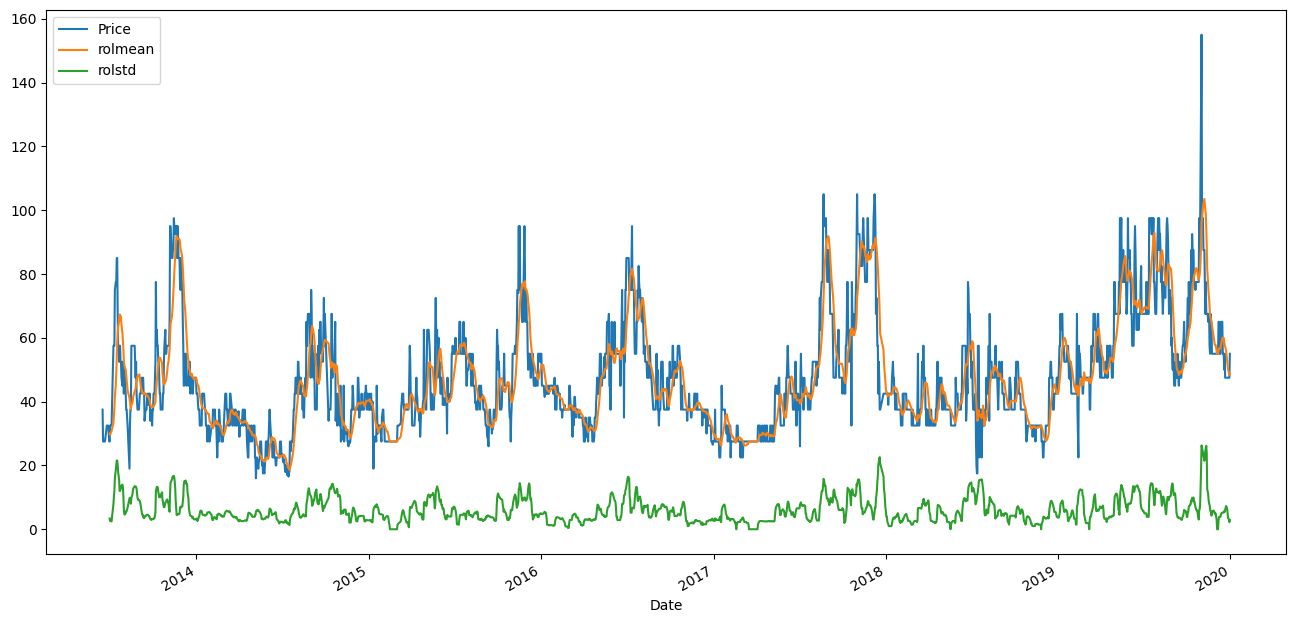

In [53]:
import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline
  
plt.show(block=False)

train[['Price', 'rolmean', 'rolstd']].plot(
  label='Price', figsize=(16, 8))

plt.show()

Dickey Fuller Test for staionarity

In [54]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(train['Price'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(train['Price'])

ADF Test Statistic : -17.09342756375355
p-value : 7.56307261282808e-30
#Lags Used : 76
Number of Observations Used : 157362
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


KPPS Test

In [55]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

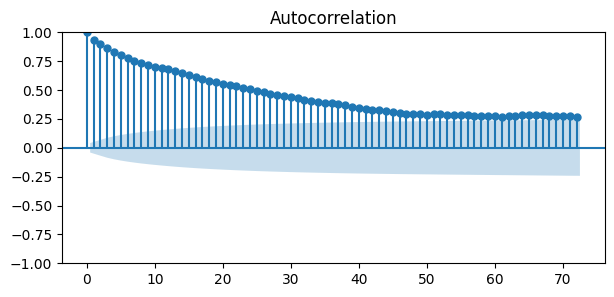

In [56]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(train['Price'], ax=ax, lags=72)
plt.show()

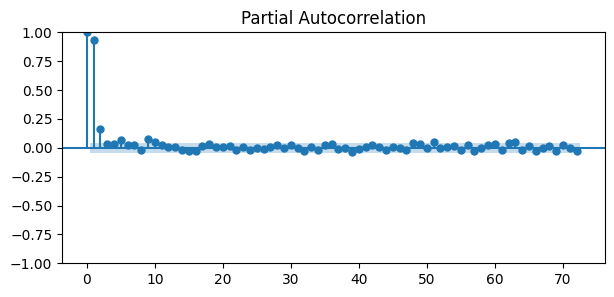

In [57]:
# Partial Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(train['Price'], ax=ax, lags=72, method='ywm')
plt.show()

In [58]:
from statsmodels.tsa.stattools import kpss

In [59]:

stats, p, lags, critical_values = kpss(train['Price'], 'ct')

In [60]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.19003996929214223
p-value: 0.01973501151544666
num lags: 28
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [61]:

if p < 0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

Series is not stationary


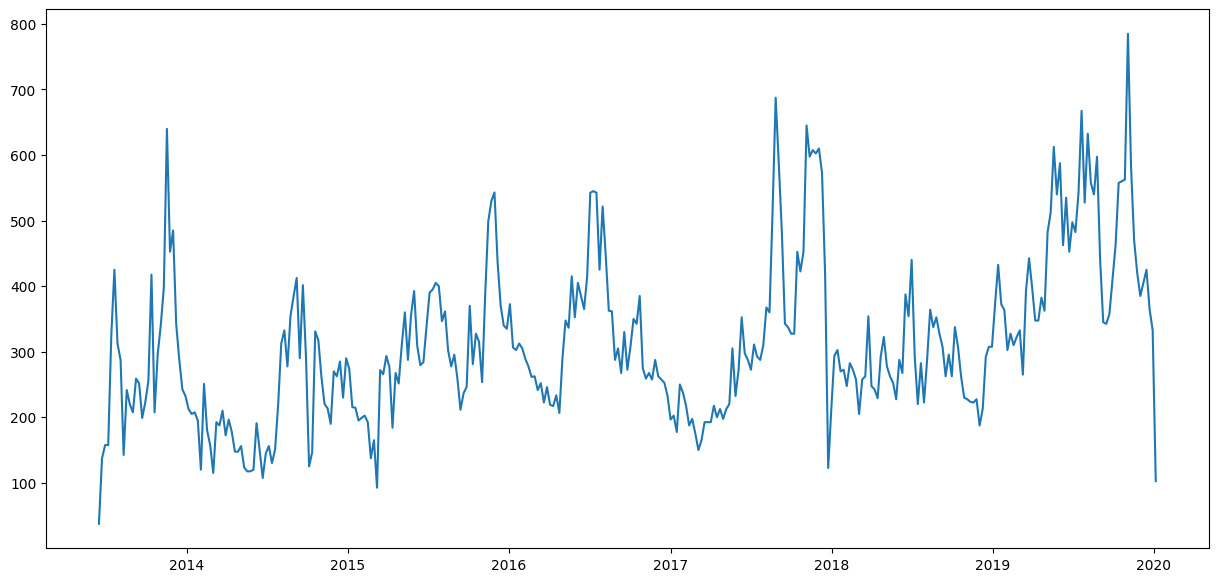

In [62]:

plt.figure(figsize=(15,7))
plt.plot(train['Price'].resample('W').sum(),label="Price")
plt.show()

Differencing

In [63]:
train['Price1'] = train['Price'] - train['Price'].shift(1)

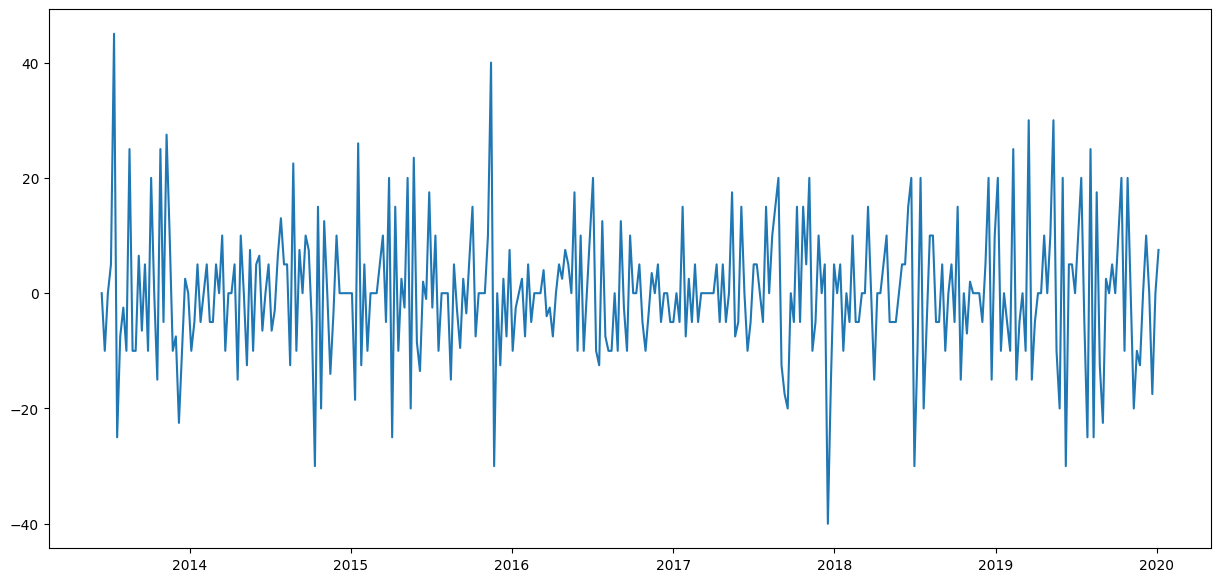

In [64]:
plt.figure(figsize=(15,7))
plt.plot(train['Price1'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

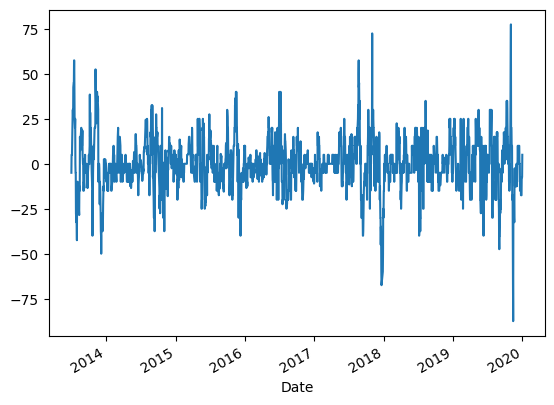

In [65]:
train['price_diff_12'] = train['Price'] - train['Price'].shift(12)

train['price_diff_12'].plot()

In [66]:
train['price_diff_12'].isnull()

Date
2013-06-16     True
2013-06-17     True
2013-06-18     True
2013-06-19     True
2013-06-20     True
              ...  
2019-12-27    False
2019-12-28    False
2019-12-29    False
2019-12-30    False
2019-12-31    False
Name: price_diff_12, Length: 2264, dtype: bool

In [67]:
train['price_diff_12'].dropna()

Date
2013-07-02    -5.0
2013-07-03     5.0
2013-07-04     5.0
2013-07-05     5.0
2013-07-09    30.0
              ... 
2019-12-27   -17.5
2019-12-28    -7.5
2019-12-29    -7.5
2019-12-30    -7.5
2019-12-31     5.0
Name: price_diff_12, Length: 2252, dtype: float64

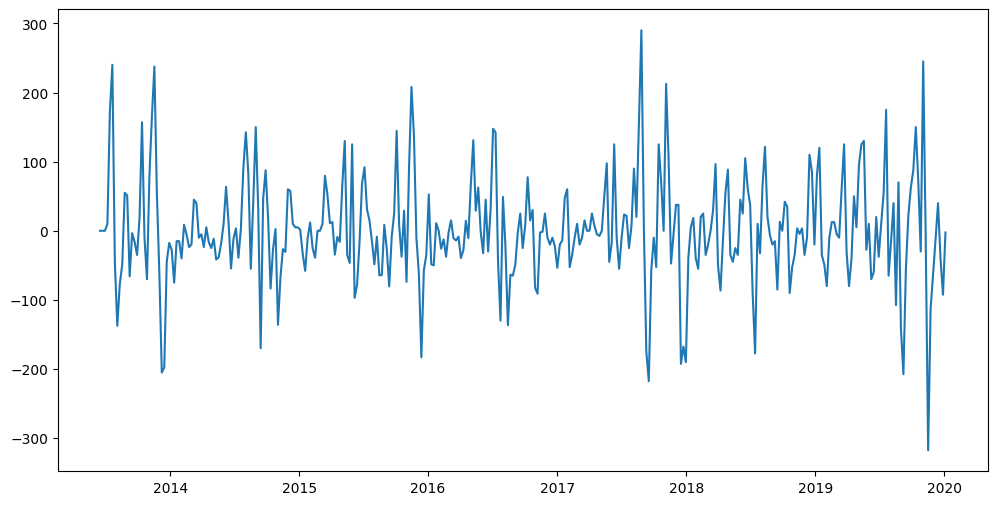

In [68]:
plt.figure(figsize=(12,6))
plt.plot(train['price_diff_12'].resample('W').sum(),label="Price")
plt.show()

Transformation

In [69]:
import numpy as np

<Axes: xlabel='Date'>

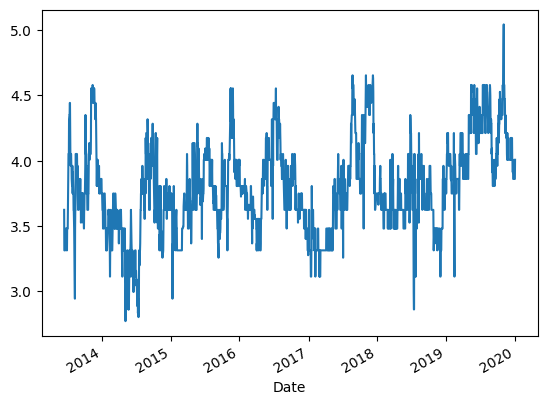

In [70]:
# calculate log
train['adj_log'] = np.log(train['Price'])
train['adj_log'].dropna().plot()

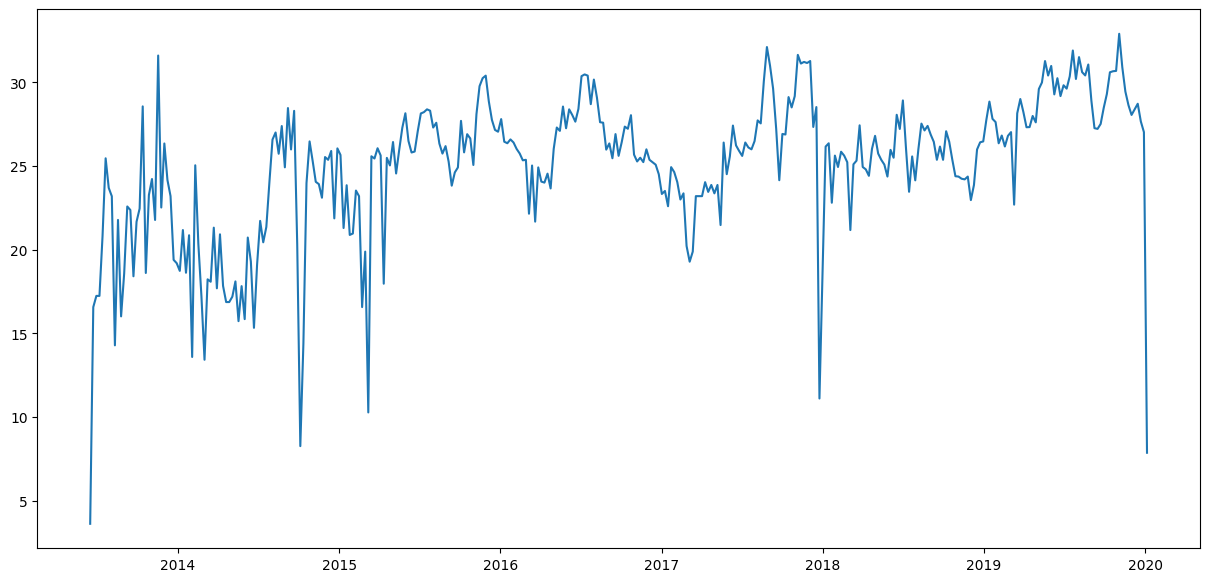

In [71]:
plt.figure(figsize=(15,7))
plt.plot(train['adj_log'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

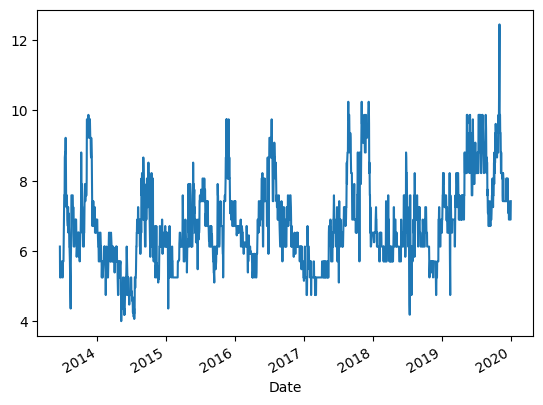

In [72]:

# calculate sqrt
train['adj_sqrt'] = np.sqrt(train['Price'])
train['adj_sqrt'].plot()

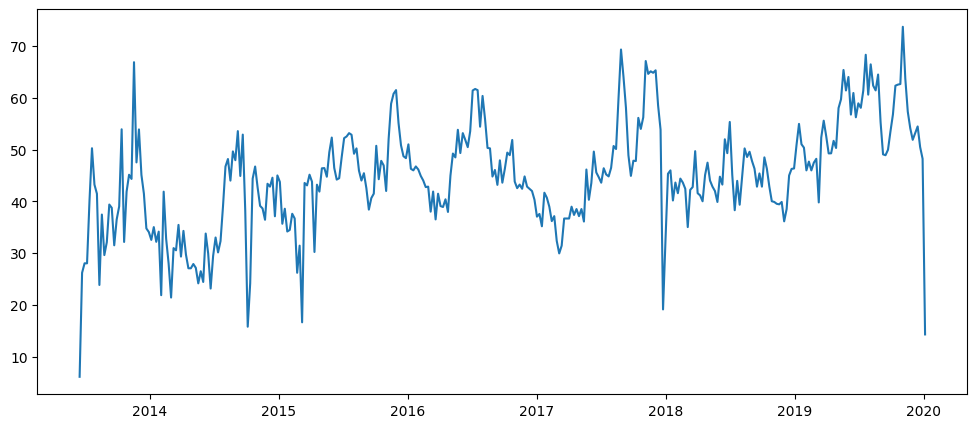

In [73]:

plt.figure(figsize=(12,5))
plt.plot(train['adj_sqrt'].resample('W').sum(),label="sales")
plt.show()

<Axes: xlabel='Date'>

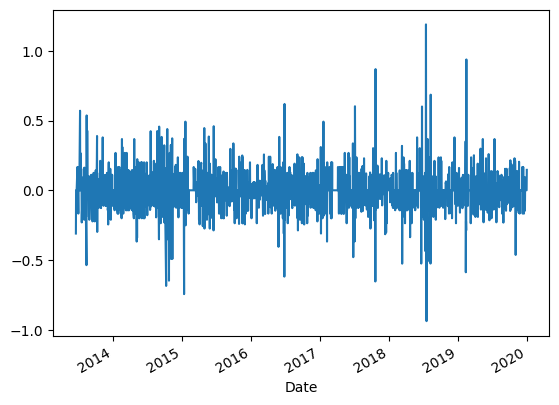

In [74]:
train['price_log_diff1'] = train['adj_log'] - train['adj_log'].shift(1)
train['price_log_diff1'].dropna().plot()

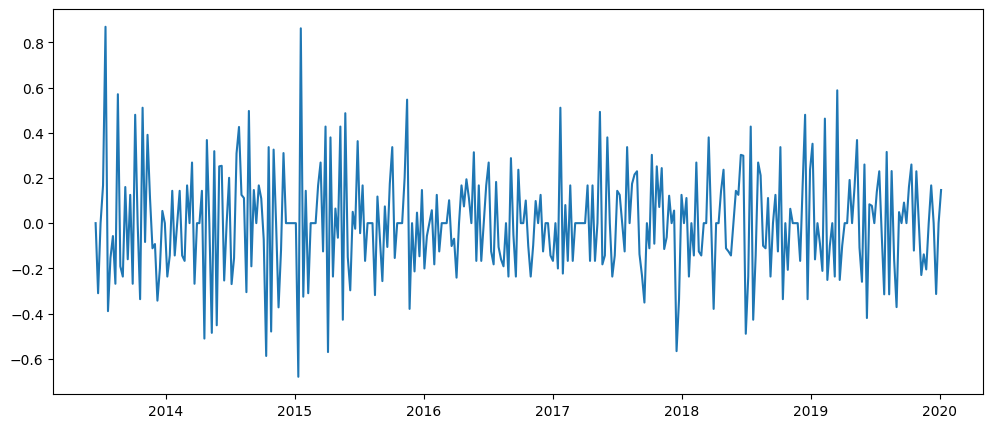

In [75]:
plt.figure(figsize=(12,5))
plt.plot(train['price_log_diff1'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

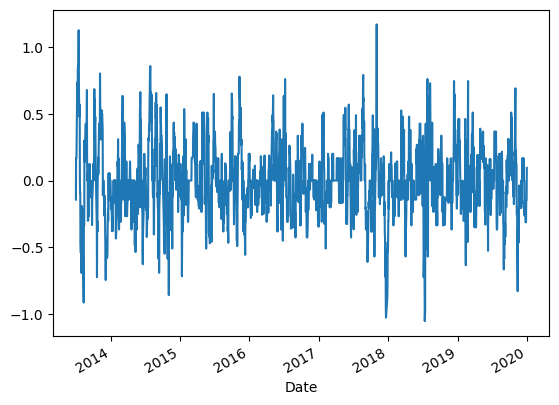

In [76]:
train['price_log_diff'] = train['adj_log'] - train['adj_log'].shift(12)
train['price_log_diff'].dropna().plot()

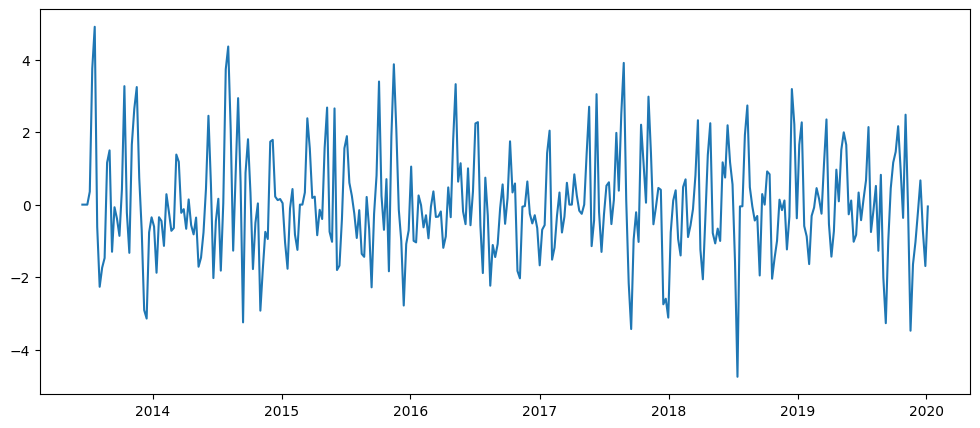

In [77]:
plt.figure(figsize=(12,5))
plt.plot(train['price_log_diff'].resample('W').sum(),label="Price")
plt.show()

In [87]:
print('Number of NaNs in price_log_diff before dropping:', train['price_log_diff'].isna().sum())

Number of NaNs in price_log_diff before dropping: 12


In [88]:
train.dropna(subset=['price_log_diff'], inplace=True)

In [89]:
print('Number of NaNs in price_log_diff after dropping:', train['price_log_diff'].isna().sum())

Number of NaNs in price_log_diff after dropping: 0


In [90]:
stats, p, lags, critical_values = kpss(train['price_log_diff'], 'ct')

In [91]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.015330742626650205
p-value: 0.1
num lags: 25
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [92]:

train

,Price,Price_diff,forecast,rolmean,rolstd,Price1,price_diff_12,adj_log,adj_sqrt,price_log_diff1,price_log_diff
Date,,,,,,,,,,,
2013-07-02,32.5,-5.0,NaN,29.583333,2.574643,5.0,-5.0,3.481240,5.700877,0.167054,-0.143101
2013-07-03,32.5,5.0,NaN,30.000000,2.611165,0.0,5.0,3.481240,5.700877,0.000000,0.167054
2013-07-04,32.5,5.0,NaN,30.416667,2.574643,0.0,5.0,3.481240,5.700877,0.000000,0.167054
2013-07-05,32.5,5.0,NaN,30.833333,2.461830,0.0,5.0,3.481240,5.700877,0.000000,0.167054
2013-07-09,57.5,30.0,NaN,33.333333,7.929615,25.0,30.0,4.051785,7.582875,0.570545,0.737599
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,47.5,-17.5,NaN,50.208333,3.608439,0.0,-17.5,3.860730,6.892024,0.000000,-0.313658
2019-12-28,47.5,-7.5,NaN,49.583333,3.342790,0.0,-7.5,3.860730,6.892024,0.000000,-0.146603
2019-12-29,47.5,-7.5,NaN,48.958333,2.911250,0.0,-7.5,3.860730,6.892024,0.000000,-0.146603


In [96]:
def monthly_price(data):
    monthly_data = data.copy()
    monthly_data.Date = monthly_data.Date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('Date')['Price'].sum().reset_index()
    monthly_data.Date = pd.to_datetime(monthly_data.Date)
    return monthly_data


In [97]:
train1 = pd.read_csv('../dataset/processed/train.csv',parse_dates=['Date'])

In [98]:
monthly_df = monthly_price(train1)
monthly_df.head()

,Date,Price
0,2013-06-16,5074.5
1,2013-06-17,4968.5
2,2013-06-18,4925.5
3,2013-06-19,5003.5
4,2013-06-20,5013.0


In [103]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    
    # Plot the total price
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='blue', label='Total Price')
    
    # Calculate the mean price per year and plot it
    second = data.groupby(data.Date.dt.year)[y_col].mean().reset_index()
    second.Date = pd.to_datetime(second.Date, format='%Y')
    mean_dates = second.Date + dt.timedelta(6*365/12)
    
    sns.lineplot(x=mean_dates, y=second[y_col], ax=ax, color='red', label='Mean Price')   
    
    ax.set(xlabel="Date", ylabel="Price", title=title)
    sns.despine()

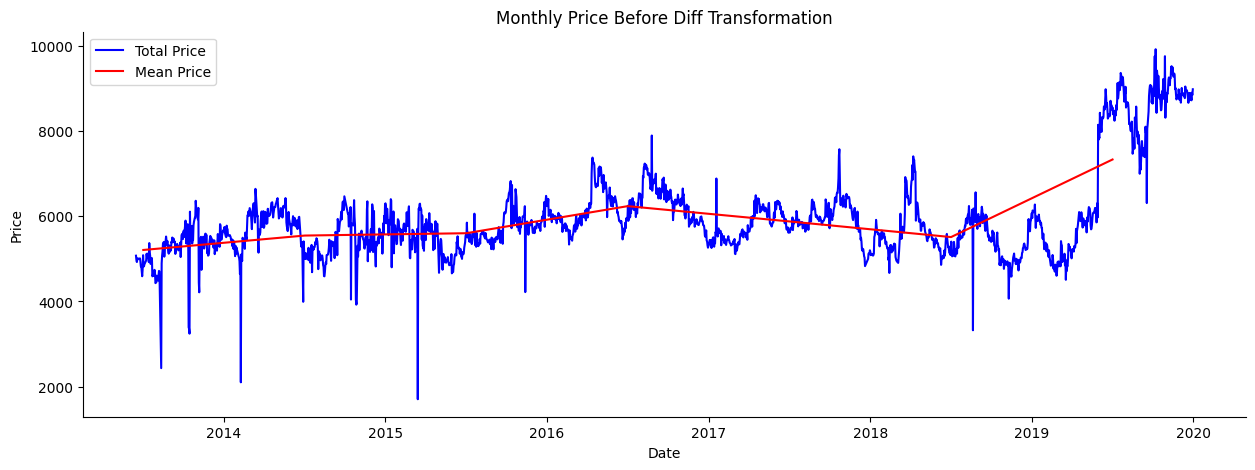

In [104]:
time_plot(monthly_df, 'Date', 'Price', 'Monthly Price Before Diff Transformation')

In [105]:

def get_diff(data):
    data['price_diff'] = data.Price.diff()
    data = data.dropna()
    
    data.to_csv('stationary_df.csv')
    return data

In [106]:

stationary_df = get_diff(monthly_df)

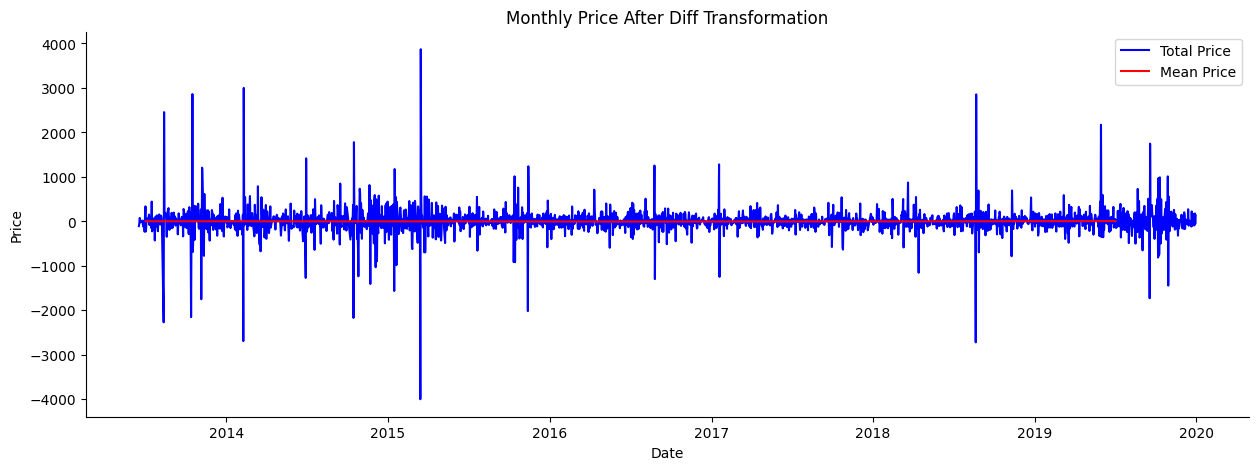

In [107]:
time_plot(stationary_df, 'Date', 'price_diff', 'Monthly Price After Diff Transformation')

In [108]:

stationary_df

,Date,Price,price_diff
1,2013-06-17,4968.5,-106.0
2,2013-06-18,4925.5,-43.0
3,2013-06-19,5003.5,78.0
4,2013-06-20,5013.0,9.5
5,2013-06-21,4993.0,-20.0
...,...,...,...
2259,2019-12-27,8810.5,-22.5
2260,2019-12-28,8720.0,-90.5
2261,2019-12-29,8899.0,179.0
2262,2019-12-30,8844.0,-55.0


In [ ]:

# KPSS test for stationarity

In [109]:
stats, p, lags, critical_values = kpss(stationary_df['price_diff'], 'ct')

In [110]:

print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.04403509130084107
p-value: 0.1
num lags: 61
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
